# importing file

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
#reading  data
df = pd.read_csv("data - Sheet1.csv")
df

,area,bedrooms,house_age,price
0,700.0,3.0,5.0,2100000
1,600.0,2.0,10.0,1100000
2,800.0,3.0,15.0,1550000
3,600.0,5.0,20.0,2200000
4,700.0,3.0,2.0,3752000
5,1100.0,5.0,1.0,5500000
6,NaN,NaN,NaN,3600000
7,8100.0,6.0,2.0,8150000
8,1600.0,5.0,3.0,7560000
9,4900.0,6.0,12.0,7600000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       14 non-null     float64
 1   bedrooms   12 non-null     float64
 2   house_age  14 non-null     float64
 3   price      15 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 608.0 bytes


In [4]:
df.describe()

,area,bedrooms,house_age,price
count,14.000000,12.0000,14.00000,1.500000e+01
mean,2535.714286,4.0000,11.50000,4.927467e+06
std,2160.344397,1.3484,8.65359,2.387949e+06
min,600.000000,2.0000,1.00000,1.100000e+06
25%,725.000000,3.0000,3.50000,2.900000e+06
50%,2100.000000,3.5000,11.00000,5.500000e+06
75%,3500.000000,5.0000,17.25000,6.830000e+06
max,8100.000000,6.0000,30.00000,8.150000e+06


## Missing Value

In [5]:
df.isnull().sum()

area         1
bedrooms     3
house_age    1
price        0
dtype: int64

In [6]:
#finding median of dataframe 
df.median()

area            2100.0
bedrooms           3.5
house_age         11.0
price        5500000.0
dtype: float64

In [7]:
# boxplot
import matplotlib.pyplot as plt
import seaborn as sns
def diagnostic_plots(df,var):
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df["area"])
    plt.title('Boxplot')
    plt.show()

******* area *******


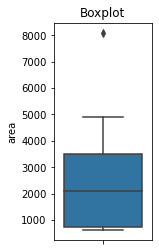

******* bedrooms *******


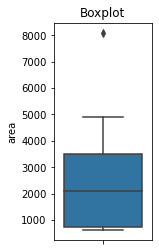

******* house_age *******


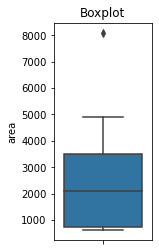

******* price *******


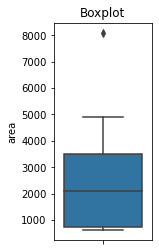

In [8]:
num_var = ["area","bedrooms","house_age","price"]
for var in df:
  print("******* {} *******".format(var))
  diagnostic_plots(df, var)

In [9]:
# filling median in bedrooms
# because it has more null value
df.bedrooms=df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,house_age,price
0,700.0,3.0,5.0,2100000
1,600.0,2.0,10.0,1100000
2,800.0,3.0,15.0,1550000
3,600.0,5.0,20.0,2200000
4,700.0,3.0,2.0,3752000
5,1100.0,5.0,1.0,5500000
6,NaN,3.5,NaN,3600000
7,8100.0,6.0,2.0,8150000
8,1600.0,5.0,3.0,7560000
9,4900.0,6.0,12.0,7600000


In [10]:
# checking null value
df.isnull().sum()

area         1
bedrooms     0
house_age    1
price        0
dtype: int64

In [11]:
# droping null value 
# because it has very less null value
df = df.dropna()

In [12]:
#displaying modified dataset
df

,area,bedrooms,house_age,price
0,700.0,3.0,5.0,2100000
1,600.0,2.0,10.0,1100000
2,800.0,3.0,15.0,1550000
3,600.0,5.0,20.0,2200000
4,700.0,3.0,2.0,3752000
5,1100.0,5.0,1.0,5500000
7,8100.0,6.0,2.0,8150000
8,1600.0,5.0,3.0,7560000
9,4900.0,6.0,12.0,7600000
10,2600.0,3.0,20.0,5500000


In [13]:
# droping dependent variable
# final_data have set of all independent variable
final_data = df.drop('price',axis="columns")


In [14]:
# displaying "final_set" data
final_data

,area,bedrooms,house_age
0,700.0,3.0,5.0
1,600.0,2.0,10.0
2,800.0,3.0,15.0
3,600.0,5.0,20.0
4,700.0,3.0,2.0
5,1100.0,5.0,1.0
7,8100.0,6.0,2.0
8,1600.0,5.0,3.0
9,4900.0,6.0,12.0
10,2600.0,3.0,20.0


# Split into Training and Testing data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, df.price, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (11, 3)
Shape of y_train =  (11,)
Shape of X_test =  (3, 3)
Shape of y_test =  (3,)


# Model Training using Linear Regression

In [16]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)  # fit funtion is used for training the dat aset

LinearRegression()

## predicting the data

In [17]:
# predicitng ( area in sqr ft, bedrooms, house_age)
model.predict([[3000,4,15]])

array([6230920.53669306])

In [18]:
model.predict([[9000,4,15]])

array([7722469.96901755])

In [19]:
model.predict([[600,2,10]])

array([2321490.60282227])

In [20]:
#checking accuracy of linear regression
model.score(final_data,df.price)

0.33847892210442154

# Model Training using Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
# finding model accuracy
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_score   # random Forest is better than linear regression

0.9549486434086273

In [23]:
# predicting value 
rfr.predict([[600,2,10]])

array([1762140.])